# Sberbank Russian Housing Market Kaggle

## Loading the required libraries and data. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
import lightgbm as lgb
import datetime
import shap
import pickle

In [2]:
# Read data files

In [3]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')
id_test = test.id
macro = pd.read_csv('Data/macro.csv')
fx = pd.read_excel('Data/BAD_ADDRESS_FIX.xlsx').drop_duplicates('id').set_index('id')

In [4]:
train.shape

(30471, 292)

In [5]:
train.isnull().sum().sum()

261026

In [6]:
macro.columns

Index(['timestamp', 'oil_urals', 'gdp_quart', 'gdp_quart_growth', 'cpi', 'ppi',
       'gdp_deflator', 'balance_trade', 'balance_trade_growth', 'usdrub',
       'eurrub', 'brent', 'net_capital_export', 'gdp_annual',
       'gdp_annual_growth', 'average_provision_of_build_contract',
       'average_provision_of_build_contract_moscow', 'rts', 'micex',
       'micex_rgbi_tr', 'micex_cbi_tr', 'deposits_value', 'deposits_growth',
       'deposits_rate', 'mortgage_value', 'mortgage_growth', 'mortgage_rate',
       'grp', 'grp_growth', 'income_per_cap',
       'real_dispos_income_per_cap_growth', 'salary', 'salary_growth',
       'fixed_basket', 'retail_trade_turnover',
       'retail_trade_turnover_per_cap', 'retail_trade_turnover_growth',
       'labor_force', 'unemployment', 'employment',
       'invest_fixed_capital_per_cap', 'invest_fixed_assets',
       'profitable_enterpr_share', 'unprofitable_enterpr_share',
       'share_own_revenues', 'overdue_wages_per_cap', 'fin_res_per_cap',
    

In [7]:
train.columns

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=292)

In [8]:
list(train.columns.values)

['id',
 'timestamp',
 'full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'product_type',
 'sub_area',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_quota',
 'preschool_education_centers_raion',
 'children_school',
 'school_quota',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'hospital_beds_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all',
 'ekder_male',
 'ekder_female',
 '0_6_all',
 '0_6_male',
 '0_6_female',
 '7_14_all',
 '7_14_male',
 '7_14_female',
 '0_17_all',
 '0_17_male',
 '0_17_female',
 '16_29_all',
 '16_29_male',
 '16_29_female',
 '0_13_all',
 '0_13_male',
 '0_13_female',
 'raion_build_count_with_material_info',
 'build_count_block',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'raion_build_count_with_builddate_info',
 'build_count_before_1920',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995',
 'ID_metro',
 'metro_min_avto',
 'metro_km_avto',
 'metro_min_walk',
 'metro_km_walk',
 'kindergarten_km',
 'school_km',
 'park_km',
 'green_zone_km',
 'industrial_km',
 'water_treatment_km',
 'cemetery_km',
 'incineration_km',
 'railroad_station_walk_km',
 'railroad_station_walk_min',
 'ID_railroad_station_walk',
 'railroad_station_avto_km',
 'railroad_station_avto_min',
 'ID_railroad_station_avto',
 'public_transport_station_km',
 'public_transport_station_min_walk',
 'water_km',
 'water_1line',
 'mkad_km',
 'ttk_km',
 'sadovoe_km',
 'bulvar_ring_km',
 'kremlin_km',
 'big_road1_km',
 'ID_big_road1',
 'big_road1_1line',
 'big_road2_km',
 'ID_big_road2',
 'railroad_km',
 'railroad_1line',
 'zd_vokzaly_avto_km',
 'ID_railroad_terminal',
 'bus_terminal_avto_km',
 'ID_bus_terminal',
 'oil_chemistry_km',
 'nuclear_reactor_km',
 'radiation_km',
 'power_transmission_line_km',
 'thermal_power_plant_km',
 'ts_km',
 'big_market_km',
 'market_shop_km',
 'fitness_km',
 'swim_pool_km',
 'ice_rink_km',
 'stadium_km',
 'basketball_km',
 'hospice_morgue_km',
 'detention_facility_km',
 'public_healthcare_km',
 'university_km',
 'workplaces_km',
 'shopping_centers_km',
 'office_km',
 'additional_education_km',
 'preschool_km',
 'big_church_km',
 'church_synagogue_km',
 'mosque_km',
 'theater_km',
 'museum_km',
 'exhibition_km',
 'catering_km',
 'ecology',
 'green_part_500',
 'prom_part_500',
 'office_count_500',
 'office_sqm_500',
 'trc_count_500',
 'trc_sqm_500',
 'cafe_count_500',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500',
 'cafe_count_500_na_price',
 'cafe_count_500_price_500',
 'cafe_count_500_price_1000',
 'cafe_count_500_price_1500',
 'cafe_count_500_price_2500',
 'cafe_count_500_price_4000',
 'cafe_count_500_price_high',
 'big_church_count_500',
 'church_count_500',
 'mosque_count_500',
 'leisure_count_500',
 'sport_count_500',
 'market_count_500',
 'green_part_1000',
 'prom_part_1000',
 'office_count_1000',
 'office_sqm_1000',
 'trc_count_1000',
 'trc_sqm_1000',
 'cafe_count_1000',
 'cafe_sum_1000_min_price_avg',
 'cafe_sum_1000_max_price_avg',
 'cafe_avg_price_1000',
 'cafe_count_1000_na_price',
 'cafe_count_1000_price_500',
 'cafe_count_1000_price_1000',
 'cafe_count_1000_price_1500',
 'cafe_count_1000_price_2500',
 'cafe_count_1000_price_4000',
 'cafe_count_1000_

# Fixing data issues

In [9]:
train.loc[train.state>30,'state'] = np.nan
train.build_year[train.build_year == 20052009] = 2007
train.build_year[train.build_year == 4965] = 2007

C:\Users\Valentas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Valentas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# Data Fix for lat, long
train.update(fx)
test.update(fx)
print('Fix in train: ', train.index.intersection(fx.index).shape[0])
print('Fix in test : ', test.index.intersection(fx.index).shape[0])

Fix in train:  550
Fix in test :  115


# Data vizualization

In [11]:
# Concatenate train and test data sets
frames = [train, test]
df = pd.concat(frames)

C:\Users\Valentas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


<BarContainer object of 54 artists>

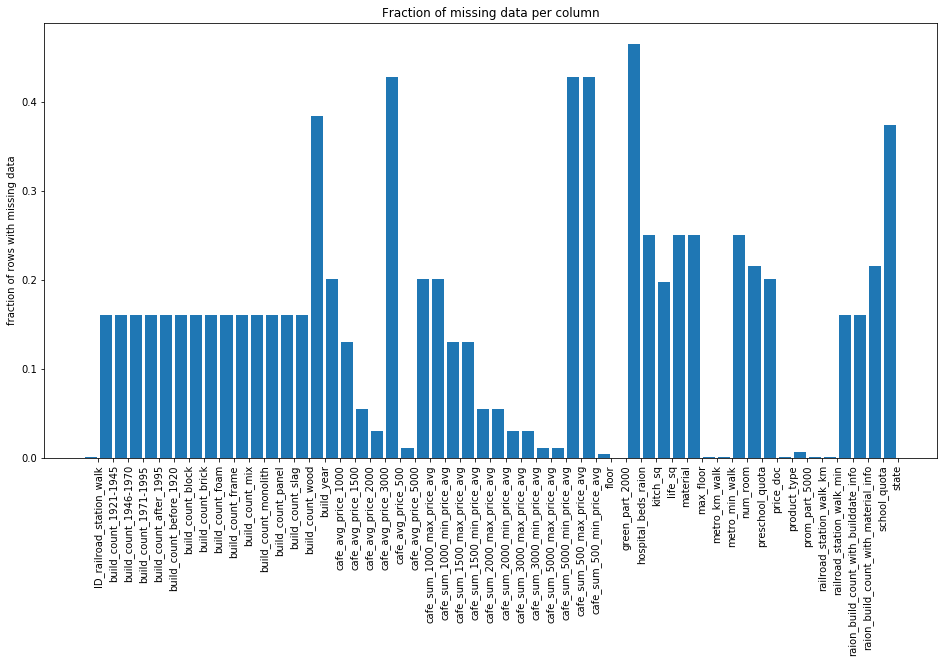

In [12]:
null_counts = df.isnull().sum()/len(df)
null_counts = null_counts[null_counts > 0]
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.title('Fraction of missing data per column')
plt.bar(np.arange(len(null_counts)),null_counts)

Text(0,0.5,'Price')

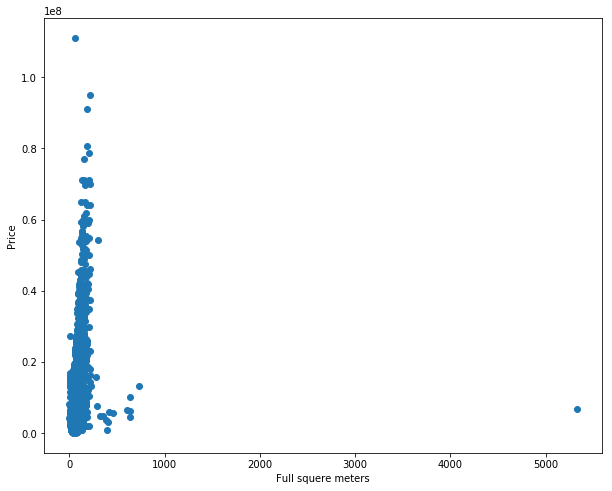

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(df['full_sq'],df['price_doc'])
plt.xlabel('Full squere meters')
plt.ylabel('Price')

Text(0,0.5,'Price')

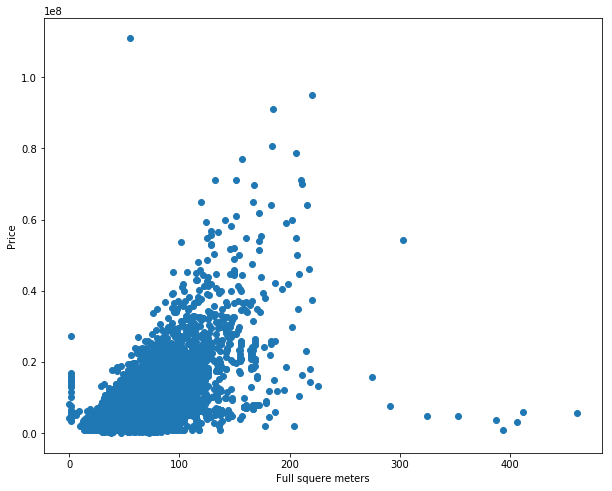

In [14]:
temp_df = df[df.full_sq < 600]
plt.figure(figsize=(10,8))
plt.scatter(temp_df['full_sq'],temp_df['price_doc'])
plt.xlabel('Full squere meters')
plt.ylabel('Price')

Text(0,0.5,'Frequency')

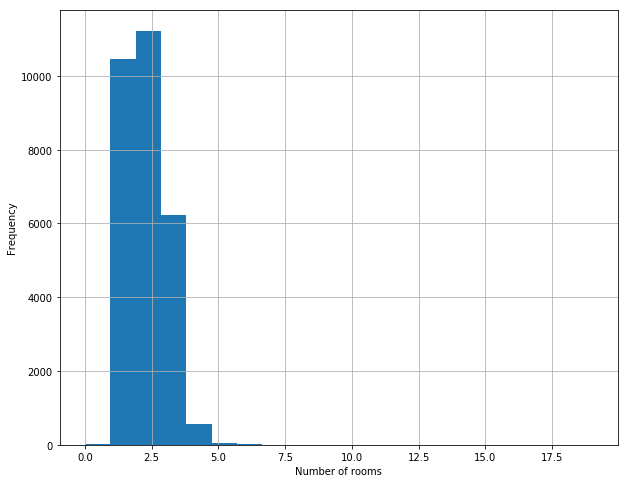

In [15]:
plt.figure(figsize=(10,8))
df.num_room.hist(bins=20)
plt.xlabel('Number of rooms')
plt.ylabel('Frequency')

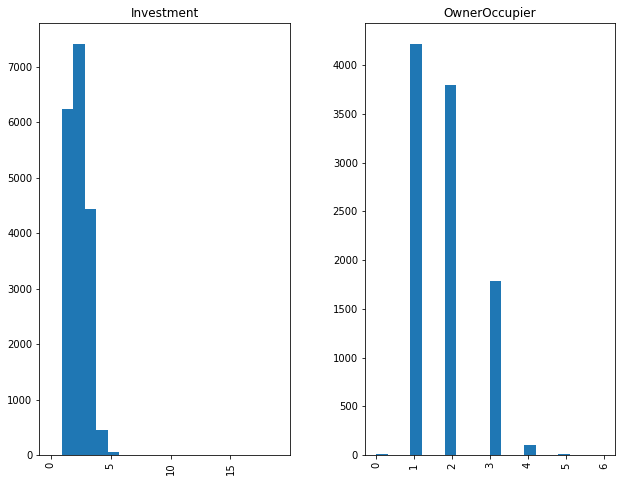

In [16]:
axes = df.num_room.hist(bins=20, by = df["product_type"], figsize=(10,8))

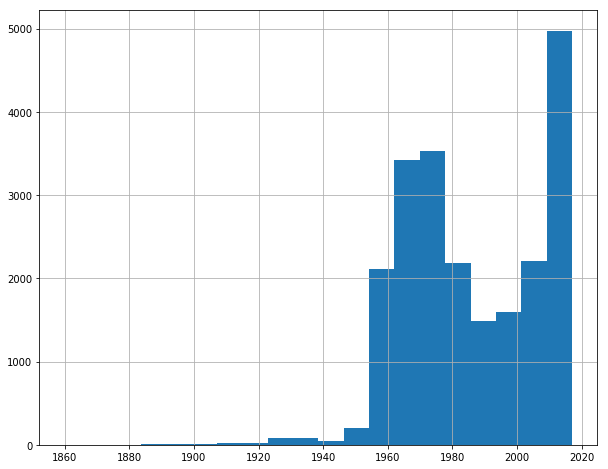

In [17]:
temp_df = df[(df.build_year > 1691) & (df.build_year < 2018) ]
temp_df.build_year.hist(bins = 20, figsize=(10,8))

Text(0.5,0.98,'Average price per year')

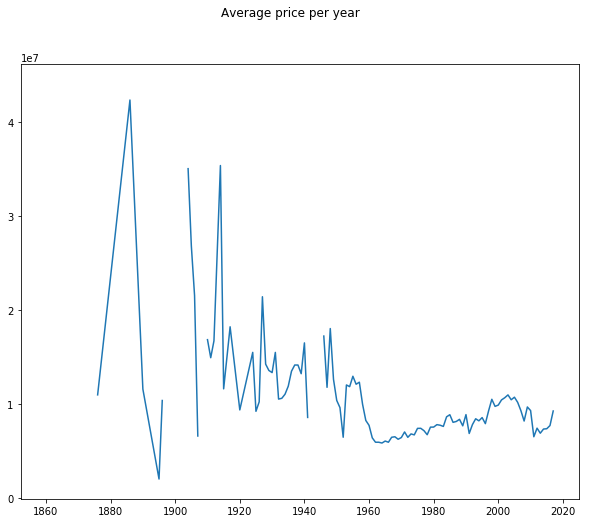

In [18]:
temp_df = df[(df.build_year > 1691) & (df.build_year < 2018) ]
temp_df = temp_df[['build_year','price_doc']]
temp_df = temp_df.groupby('build_year').mean()
temp_df.reset_index(inplace=True)
fig = plt.figure(figsize=(10,8))
plt.plot(temp_df.build_year, temp_df.price_doc)
fig.suptitle('Average price per year')

C:\Users\Valentas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  after removing the cwd from sys.path.


Text(0.5,0.98,'Average price per day')

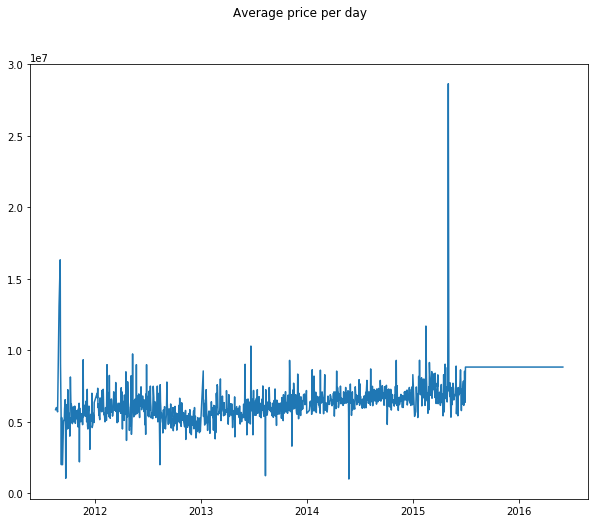

In [19]:
df_temp = df
df_temp = df_temp.set_index(['timestamp'])
df_temp.index = pd.to_datetime(df_temp.index)
df_temp = df_temp.resample('D', how='median').loc[df_temp.index].fillna(method='ffill')
fig = plt.figure(figsize=(10,8))
plt.plot(df_temp.price_doc)
fig.suptitle('Average price per day')

C:\Users\Valentas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  after removing the cwd from sys.path.


Text(0.5,0.98,'Quantity of RL transactions per day')

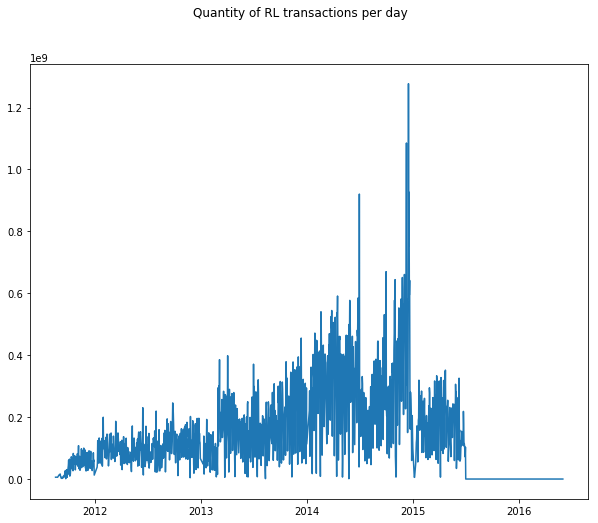

In [20]:
df_temp = df
df_temp = df_temp.set_index(['timestamp'])
df_temp.index = pd.to_datetime(df_temp.index)
df_temp = df_temp.resample('D', how='sum').loc[df_temp.index].fillna(method='ffill')
fig = plt.figure(figsize=(10,8))
plt.plot(df_temp.price_doc)
fig.suptitle('Quantity of RL transactions per day')

C:\Users\Valentas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Valentas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5,0.98,'Median price per month')

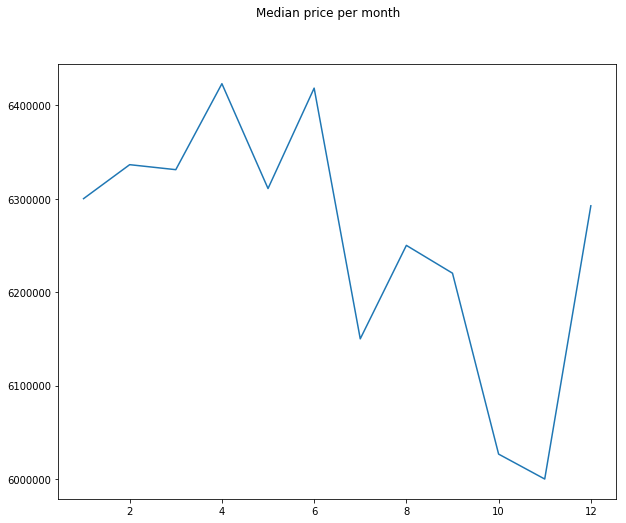

In [21]:
df_temp = df
df_temp = df_temp[['timestamp','price_doc']]
df_temp['timestamp'] =  pd.to_datetime(df_temp['timestamp'])
df_temp['month'] = df_temp['timestamp'].dt.month
df_temp = df_temp[['month','price_doc']]
df_temp = df_temp.groupby(['month']).median()
fig = plt.figure(figsize=(10,8))
plt.plot(df_temp.index, df_temp.price_doc)
fig.suptitle('Median price per month')

Text(0,0.5,'Price')

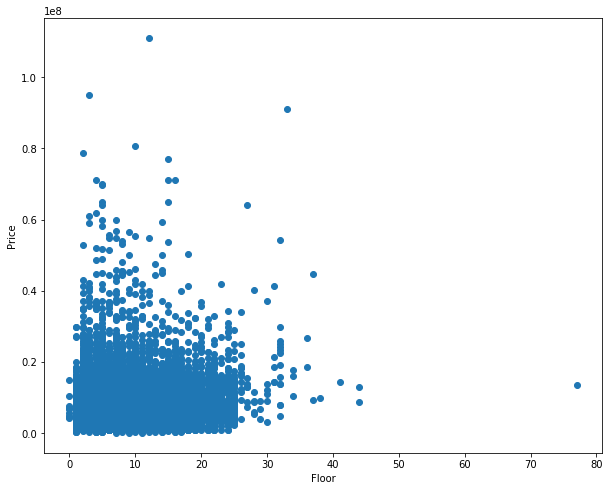

In [22]:
fig = plt.figure(figsize=(10,8))
plt.scatter(df['floor'],df['price_doc'])
plt.xlabel('Floor')
plt.ylabel('Price')

Text(0,0.5,'Price')

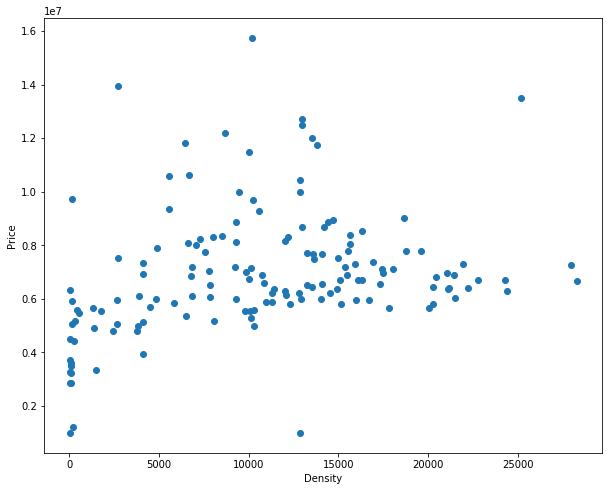

In [23]:
df_temp = df
df_temp['area_km'] = df_temp.area_m/1000000
df_temp['density'] = df_temp.raion_popul/df_temp.area_km
df_temp = df_temp[['sub_area', 'density', 'price_doc']]
df_temp = df_temp.groupby(['sub_area','density']).median()
df_temp = df_temp.reset_index(drop=False)
df_temp = df_temp[['density', 'price_doc']]
df_temp = df_temp.groupby(['density']).median()
fig = plt.figure(figsize=(10,8))
plt.scatter(df_temp.index, df_temp.price_doc)
plt.xlabel('Density')
plt.ylabel('Price')

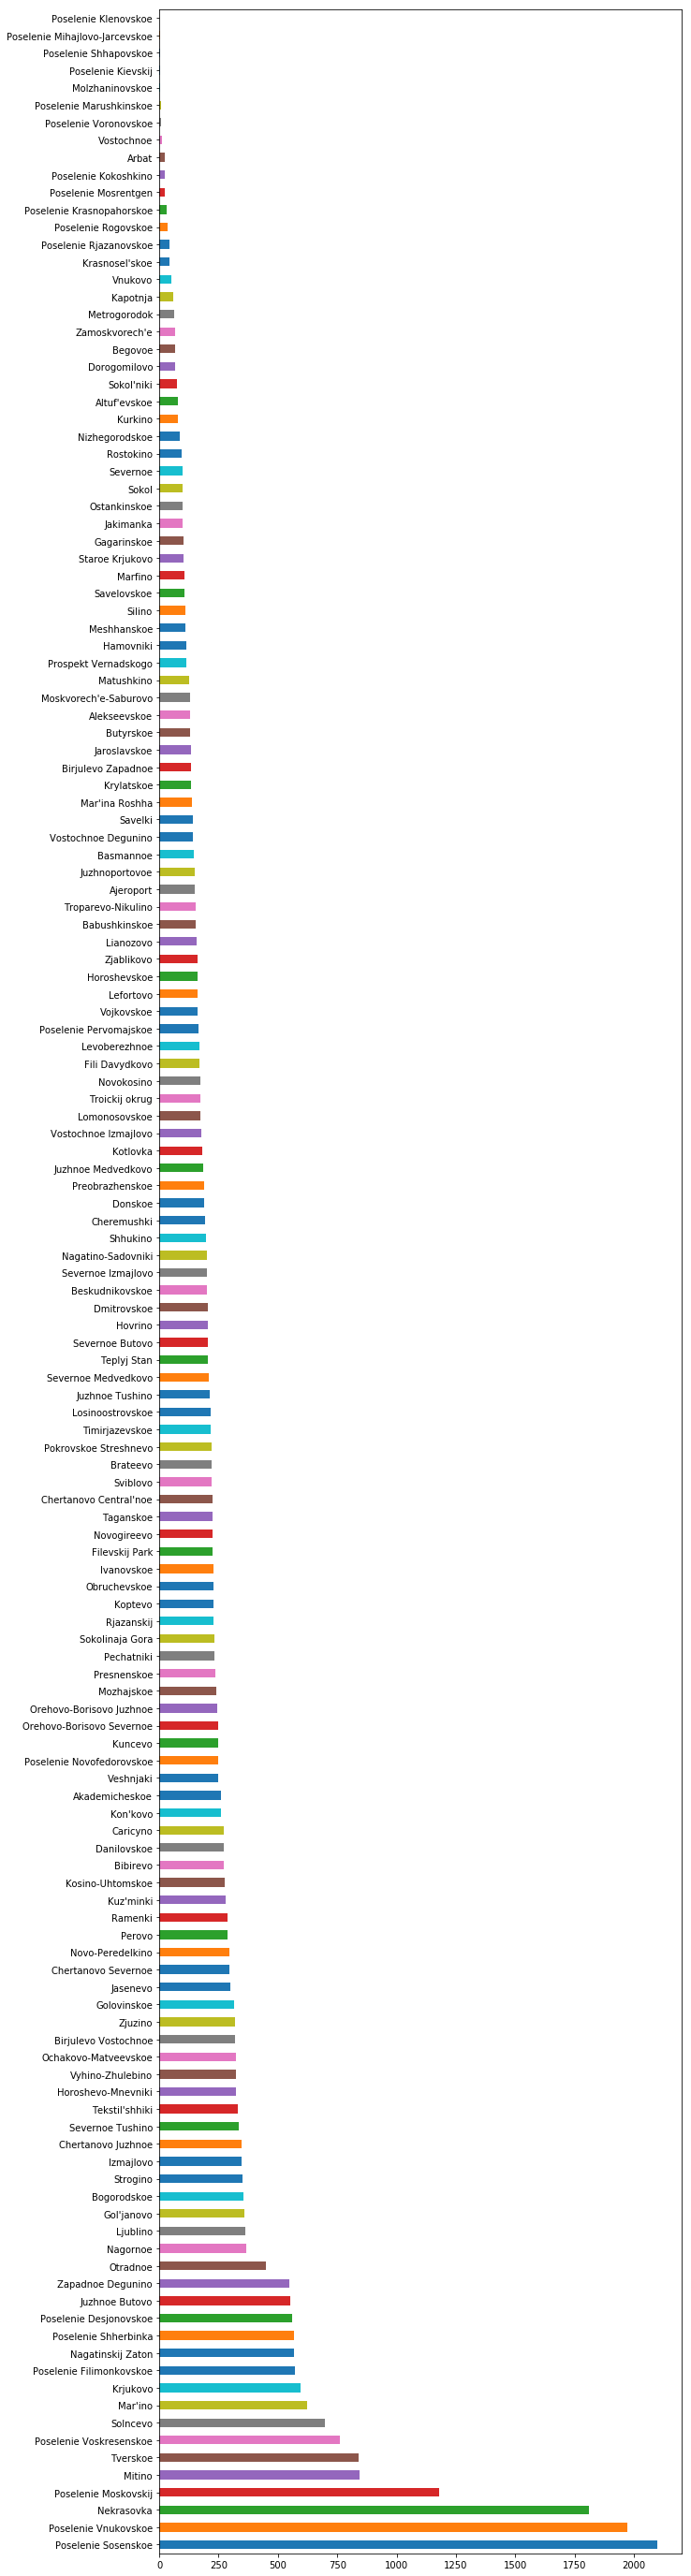

In [24]:
df['sub_area'].value_counts().plot(kind='barh', figsize = (10, 50))

# Removing outliers

In [25]:
#Removing extreme values
train.loc[train.full_sq == 0, 'full_sq'] = 50
train = train[train.price_doc/train.full_sq <= 600000]
train = train[train.price_doc/train.full_sq >= 10000]

In [26]:
###Dealing with Outlier###
def remove_outlier(df):
    df.loc[df.full_sq>2000,'full_sq'] = np.nan
    df.loc[df.full_sq<3,'full_sq'] = np.nan
    df.loc[df.life_sq>500,'life_sq'] = np.nan
    df.loc[df.life_sq<3,'life_sq'] = np.nan
    df.loc[df.life_sq>0.8*df.full_sq,'life_sq'] = np.nan
    df.loc[df.kitch_sq>=df.life_sq,'kitch_sq'] = np.nan
    df.loc[df.kitch_sq>500,'kitch_sq'] = np.nan
    df.loc[df.kitch_sq<2,'kitch_sq'] = np.nan
    df.loc[df.build_year<1800,'build_year'] = np.nan
    df.loc[df.build_year>2021,'build_year'] = np.nan
    df.loc[df.num_room>15,'num_room'] = np.nan
    df.loc[df.num_room==0,'num_room'] = np.nan
    df.loc[df.floor==0,'floor'] = np.nan
    df.loc[df.max_floor==0,'max_floor'] = np.nan
    df.loc[df.floor>df.max_floor,'max_floor'] = np.nan
    return df
    
train = remove_outlier(train)
test = remove_outlier(test)

# Feature engineering

In [27]:
train["nbnulls"]=train.isnull().sum(axis=1)
test["nbnulls"]=test.isnull().sum(axis=1)

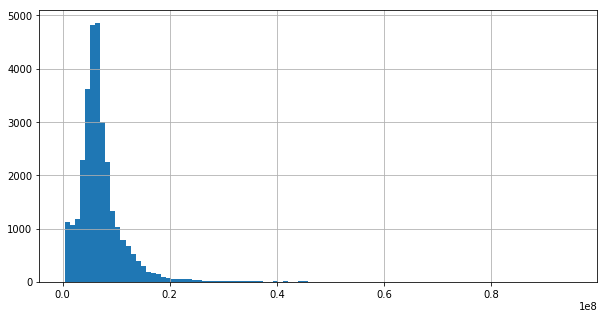

In [28]:
train.price_doc.hist(bins=100, figsize=(10,5))

In [29]:
#Convert timestamp to date format
train.timestamp = pd.to_datetime(train.timestamp)
test.timestamp = pd.to_datetime(test.timestamp)

train.timestamp.max()

Timestamp('2015-06-30 00:00:00')

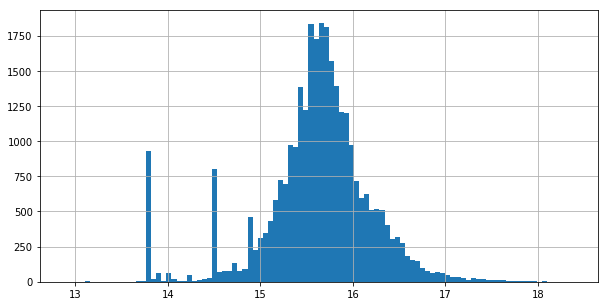

In [30]:
#Transform the price with log
np.log(train["price_doc"]+1).hist(bins=100, figsize=(10,5))

In [31]:
# Add month-year
month_year = (train.timestamp.dt.month + train.timestamp.dt.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
train['month_year_cnt'] = month_year.map(month_year_cnt_map)

month_year = (test.timestamp.dt.month + test.timestamp.dt.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
test['month_year_cnt'] = month_year.map(month_year_cnt_map)

# Add week-year count
week_year = (train.timestamp.dt.weekofyear + train.timestamp.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
train['week_year_cnt'] = week_year.map(week_year_cnt_map)

week_year = (test.timestamp.dt.weekofyear + test.timestamp.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
test['week_year_cnt'] = week_year.map(week_year_cnt_map)

# Add year, month and day-of-week
train['year'] = train.timestamp.dt.year
train['month'] = train.timestamp.dt.month
train['dow'] = train.timestamp.dt.dayofweek

test['year'] = test.timestamp.dt.year
test['month'] = test.timestamp.dt.month
test['dow'] = test.timestamp.dt.dayofweek

# Other feature engineering
train['rel_floor'] = train['floor'] / train['max_floor'].astype(float)
train['rel_kitch_sq'] = train['kitch_sq'] / train['full_sq'].astype(float)

test['rel_floor'] = test['floor'] / test['max_floor'].astype(float)
test['rel_kitch_sq'] = test['kitch_sq'] / test['full_sq'].astype(float)

train.apartment_name=train.sub_area + train['metro_km_avto'].astype(str)
test.apartment_name=test.sub_area + train['metro_km_avto'].astype(str)

train['room_size'] = train['life_sq'] / train['num_room'].astype(float)
test['room_size'] = test['life_sq'] / test['num_room'].astype(float)

C:\Users\Valentas\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
C:\Users\Valentas\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


# Feature selection

In [32]:
#dealing with macro data
macro = macro.loc[365:2343,:] #drop data before 2011 and after 2016.6
macro_full = macro.loc[:,macro.count()==1979] # drop nan columns
macro_missing = macro.loc[:2190,macro.count()==1826]
#Use principal componenet analysis to reduce variable quantity
pca = PCA(2)
pca.fit(macro_full.drop('timestamp',1).values)
eco_1 = pca.transform(macro_full.drop('timestamp',1))
pca = PCA(1)
pca.fit(macro_missing.values)
eco_2 = pca.transform(macro_missing)
eco = pd.DataFrame()
eco['timestamp'] = macro['timestamp']
eco['index1'] = eco_1[:,0]
eco['index2'] = eco_1[:,1]

In [33]:
#Merging the macro indicators dataset with real estate data
macro.timestamp = pd.to_datetime(macro.timestamp)
train = train.join(macro.set_index('timestamp'), on='timestamp')
test = test.join(macro.set_index('timestamp'), on='timestamp')

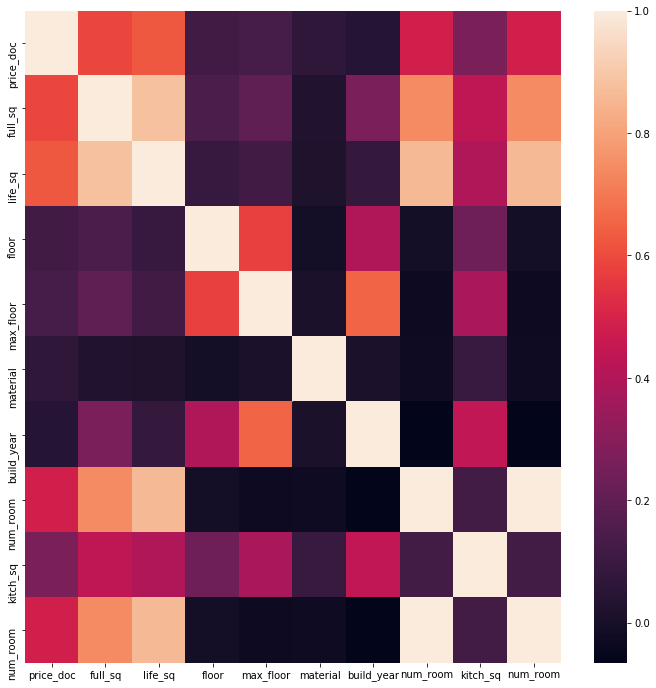

In [34]:
#corr analysis
columns = ['price_doc', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq', 'num_room']
temp_df = train[columns]
corr = temp_df.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           ax = ax)

## Multicollinearity can be dealted with automatically, but its time consuming

# Selecting main columns and spltting dataset

In [35]:
def drop_columns(df):
    df = df.drop(['16_29_male','cafe_count_5000_price_1500','market_count_1000',
      '0_6_male','young_male','build_count_before_1920','market_count_1500',
      'trc_count_500','church_count_3000','cafe_count_2000_na_price',
      'mosque_count_3000','leisure_count_2000','build_count_slag',
      "oil_chemistry_raion","railroad_terminal_raion","mosque_count_500",
      "nuclear_reactor_raion", "build_count_foam", "big_road1_1line",
      "trc_sqm_500", "cafe_count_500_price_high","mosque_count_1000", "mosque_count_1500"],1)
    
    df = df.drop(["real_dispos_income_per_cap_growth","profitable_enterpr_share",
         "unprofitable_enterpr_share","share_own_revenues","overdue_wages_per_cap",
         "fin_res_per_cap","marriages_per_1000_cap","divorce_rate","construction_value",
         "invest_fixed_assets_phys","pop_migration","pop_total_inc","housing_fund_sqm",
         "lodging_sqm_per_cap","water_pipes_share","baths_share","sewerage_share","gas_share",
         "hot_water_share","electric_stove_share","heating_share","old_house_share",
         "infant_mortarity_per_1000_cap", "perinatal_mort_per_1000_cap", "incidence_population",
         "load_of_teachers_preschool_per_teacher","provision_doctors","power_clinics","hospital_beds_available_per_cap",
         "hospital_bed_occupancy_per_year","provision_retail_space_sqm","provision_retail_space_sqm",
         "theaters_viewers_per_1000_cap","museum_visitis_per_100_cap","population_reg_sports_share",
         "students_reg_sports_share","apartment_build",
         'gdp_annual_growth','old_education_build_share','provision_nurse','employment',
         'apartment_fund_sqm','invest_fixed_capital_per_cap'],1)
    
    return df

In [36]:
train = drop_columns(train)
test = drop_columns(test)

In [37]:
#Selecting only main columns
# columns =
# def select_main_columns(df, columns):
#     df = df[columns]
#     return df

# train = select_main_columns(train, columns)
# test = select_main_columns(test, columns)

In [38]:
# Assign weight
def assign_weights(df):
    df['w'] = 1
    df.loc[df.price_doc==1000000,'w'] *= 0.5
    df.loc[df.year==2015,'w'] *= 1.5
    return df

train = assign_weights(train)

In [39]:
#Convert object type columns
def convert_object_type(x_all):
    for c in x_all.columns:
        if x_all[c].dtype == 'object':
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(x_all[c].values))
            x_all[c] = lbl.transform(list(x_all[c].values))
    return x_all

In [40]:
#Split target variable from predictors
train = train.drop(["id"], axis = 1)
test = test.drop(["id"], axis = 1)

train = train[train.price_doc>1000000]
w = train.w.values
y_train = np.log(train["price_doc"]+1)

x_train = train.drop(["timestamp", "price_doc", "w"], axis=1)
x_test = test.drop(["timestamp"], axis=1)

num_train = len(x_train)
x_all = pd.concat([x_train, x_test])

x_all = convert_object_type(x_all)

x_train = x_all[:num_train]
x_test = x_all[num_train:]

## Parameter selection
Hyper parameter optimization can be used to select optimal parameters, however we will be using the ones listed below

## Cross validation

Cross validation is used to eveluate the model performance with the chosen parameters

C:\Users\Valentas\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[25]	cv_agg's rmse: 0.397786
[50]	cv_agg's rmse: 0.378122
[75]	cv_agg's rmse: 0.371195
[100]	cv_agg's rmse: 0.367307
[125]	cv_agg's rmse: 0.365122
[150]	cv_agg's rmse: 0.363744
[175]	cv_agg's rmse: 0.362636
[200]	cv_agg's rmse: 0.361989
[225]	cv_agg's rmse: 0.361405
[250]	cv_agg's rmse: 0.360939
[275]	cv_agg's rmse: 0.360557
[300]	cv_agg's rmse: 0.360367
[325]	cv_agg's rmse: 0.360173
[350]	cv_agg's rmse: 0.36009
[375]	cv_agg's rmse: 0.359895
[400]	cv_agg's rmse: 0.359751
[425]	cv_agg's rmse: 0.359625
[450]	cv_agg's rmse: 0.359421
[475]	cv_agg's rmse: 0.359393
[500]	cv_agg's rmse: 0.359359
[525]	cv_agg's rmse: 0.359388
best num_boost_rounds =  489


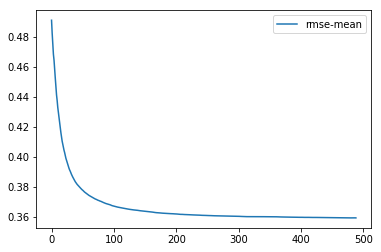

In [41]:
LightGBM_params = {
    'objective':'regression',
    'metric':'rmse',
    'learning_rate':0.05,
    'max_depth':-1,
    'sub_feature':0.7,
    'sub_row':1,
    'num_leaves':15,
    'min_data':30,
    'max_bin':20,
    'bagging_fraction':0.9,
    'bagging_freq':40,
    'verbosity':-1}

train = lgb.Dataset(x_train, y_train, weight = w)

cv_output = lgb.cv(LightGBM_params, train, num_boost_round=10000, early_stopping_rounds=50, verbose_eval=25, show_stdv=False, nfold=10)
cv_output = pd.DataFrame(cv_output)
cv_output[['rmse-mean']].plot()
print('best num_boost_rounds = ', len(cv_output))

## Training the model

In [42]:
model = lgb.train(LightGBM_params, train, num_boost_round = 489)

In [43]:
#Save model with Feather
pickle.dump(model, open('Results/LightGBM_model.sav', 'wb'))

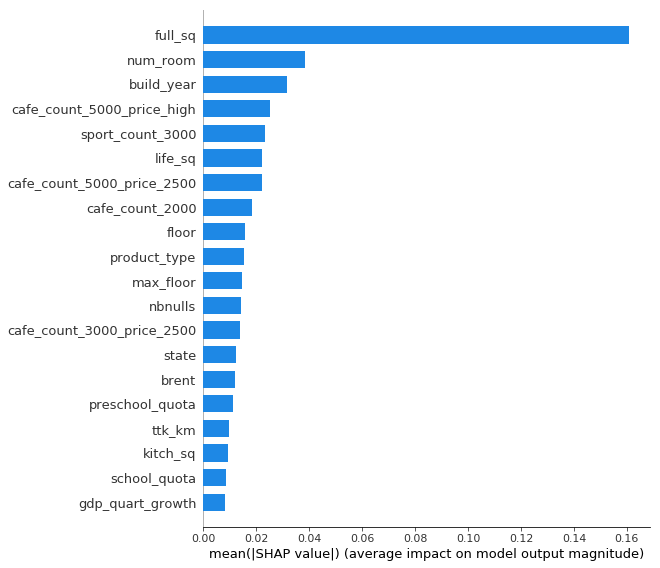

In [44]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

# summarize the effects of all the features
shap.summary_plot(shap_values, x_test, plot_type="bar", auto_size_plot = True, show = False)

In [45]:
## Select main importance features
fs = model.feature_importance()
f_name = model.feature_name()
f = dict()
for i in range(0,len(fs)):
   f[f_name[i]]=fs[i]
print(f_name)

['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'product_type', 'sub_area', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'thermal_power_plant_raion', 'incineration_raion', 'radiation_raion', 'big_market_raion', 'detention_facility_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_f

## Predicting

In [46]:
#Read model
model = pickle.load(open('Results/LightGBM_model.pkl', 'rb'))

In [47]:
prediction = model.predict(x_test)
prediction = np.exp(prediction) - 1

output = pd.read_csv('Data/test.csv')
output = output[['id']]
output['price_doc'] = prediction
output.to_csv('Results/Submission_lgb.csv',index=False)